Analyse Exploratoire des Données(Amazon)
ANAS TAZI
ZOUANI YASSMINE 
SALMA ELFATIHI

#importation des bibliotheque

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#charger les données d'amazon

In [70]:
import pandas as pd
Amazon_df = pd.read_csv('Amazon.csv')


# Question 1 : Top 5 des meilleures catégories

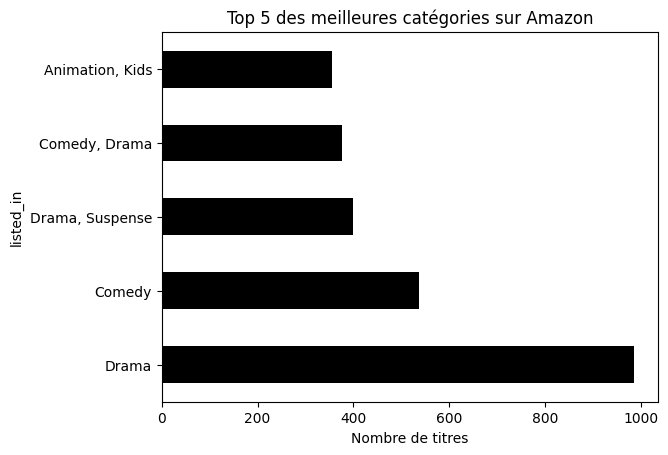

In [71]:
QUESTION1 = Amazon_df['listed_in'].value_counts().head(5)
QUESTION1.plot(kind='barh', color='black')
plt.xlabel('Nombre de titres')
plt.title('Top 5 des meilleures catégories sur Amazon')
plt.show()


2. Top 5 des réalisateurs

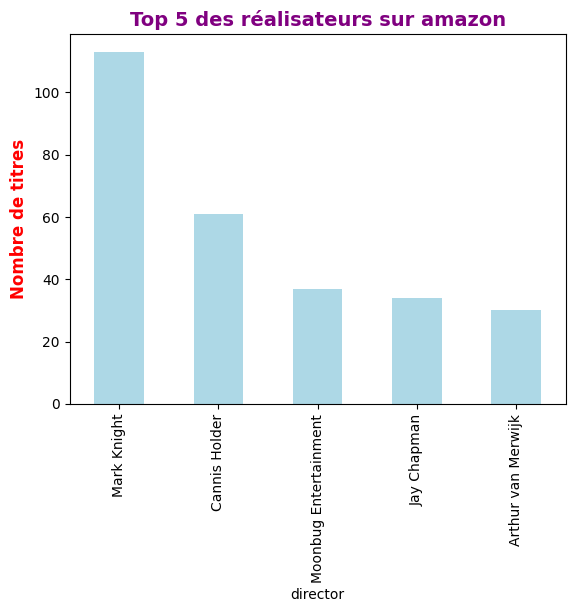

In [72]:
question2 = Amazon_df['director'].value_counts().head(5)
question2.plot(kind='bar', color='lightblue') 
plt.ylabel('Nombre de titres', fontsize=12, fontweight='bold', color='red')  
plt.title('Top 5 des réalisateurs sur amazon', fontsize=14, fontweight='bold', color='purple')  
plt.show()


3.Les dix meilleurs acteurs.

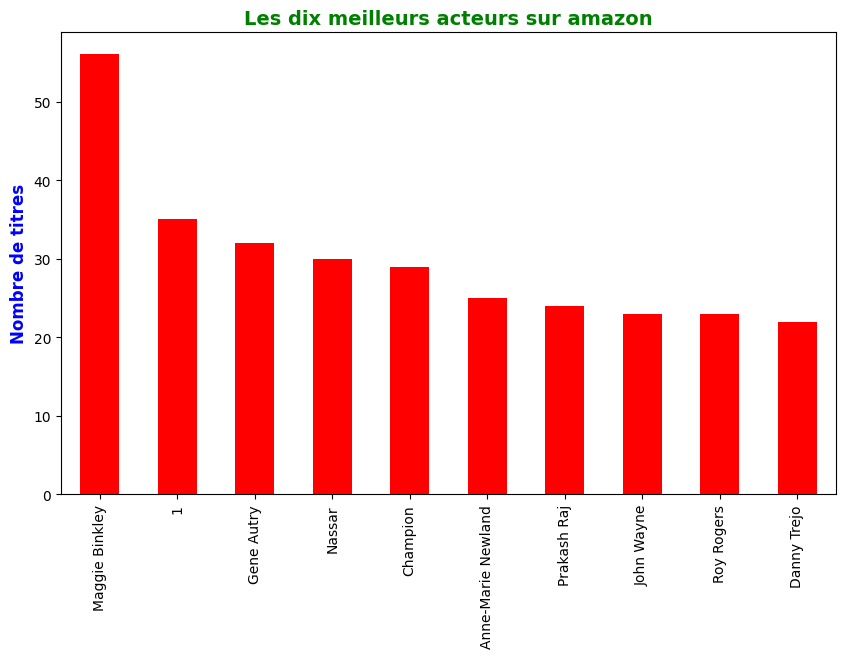

In [73]:

 question3 = Amazon_df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10, 6)) 
question3.plot(kind='bar', color='red')  

plt.ylabel('Nombre de titres', fontsize=12, fontweight='bold', color='blue')
plt.title('Les dix meilleurs acteurs sur amazon', fontsize=14, fontweight='bold', color='green')

plt.show()


4.Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

In [74]:
question4 = Amazon_df[Amazon_df['type'] == 'TV Show']

In [75]:
tv_series_data = Amazon_df[Amazon_df['type'] == 'TV Show']


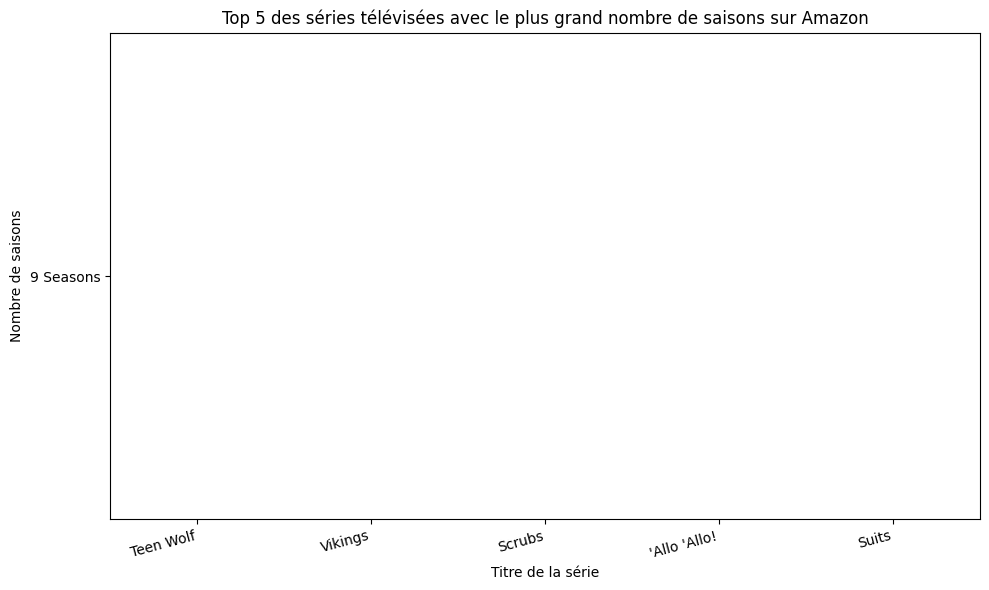

In [76]:


plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='duration', data=top_series, hue='title', palette='muted', legend=False)
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons sur Amazon')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()





    5# Question 5 : Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
# Afficher les premières lignes pour comprendre la structure des données

In [77]:
Amazon_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


# Créer un objet TfidfVectorizer pour extraire les caractéristiques textuelles


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(Amazon_df['description'])

# Calculer la similarité cosinus entre toutes les paires de descriptions

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Définir le seuil de similarité

In [80]:
similarity_threshold = 0.7

# Trouver les indices des paires de descriptions similaires
# Afficher les paires de descriptions similaires

In [81]:
similar_indices = [(i, j) for i in range(len(cosine_similarities)) for j in range(i+1, len(cosine_similarities[i])) if cosine_similarities[i][j] >= similarity_threshold]
print("Contenus similaires trouvés :")
for idx1, idx2 in similar_indices:
    print(f"Titre 1 : {Amazon_df.iloc[idx1]['title']}")
    print(f"Description 1 : {Amazon_df.iloc[idx1]['description']}")
    print(f"Titre 2 : {Amazon_df.iloc[idx2]['title']}")
    print(f"Description 2 : {Amazon_df.iloc[idx2]['description']}")
    print("\n")

Contenus similaires trouvés :
Titre 1 : Grease Live!
Description 1 : This honest, uncompromising comedy chronicles the war stories and sexual misadventures of a tight circle of lovers and friends fighting to get their acts together, for better or worse.
Titre 2 : Social Animals
Description 2 : This honest, uncompromising comedy chronicles the war stories and sexual misadventures of a tight circle of lovers and friends fighting to get their acts together, for better or worse.


Titre 1 : Yoga for Breath Awareness
Description 1 : This breathing practice will reduce stress, calm the body and focus the mind, while also increasing energy. It is easy to begin this awareness by implementing five simple steps. This is perfect for short everyday relaxation before your exercise practice. Classically trained in the art of yoga in India and Canada, Anne-Marie Newland presents her own dynamic style of yoga known as Sun-Power Yoga.
Titre 2 : Alternate Nostril Breathing
Description 2 : This breathing

#6.Netflix/Amazon/Disney se concentre-t-il davantage sur les séries télévisées que sur les
films ces dernières années

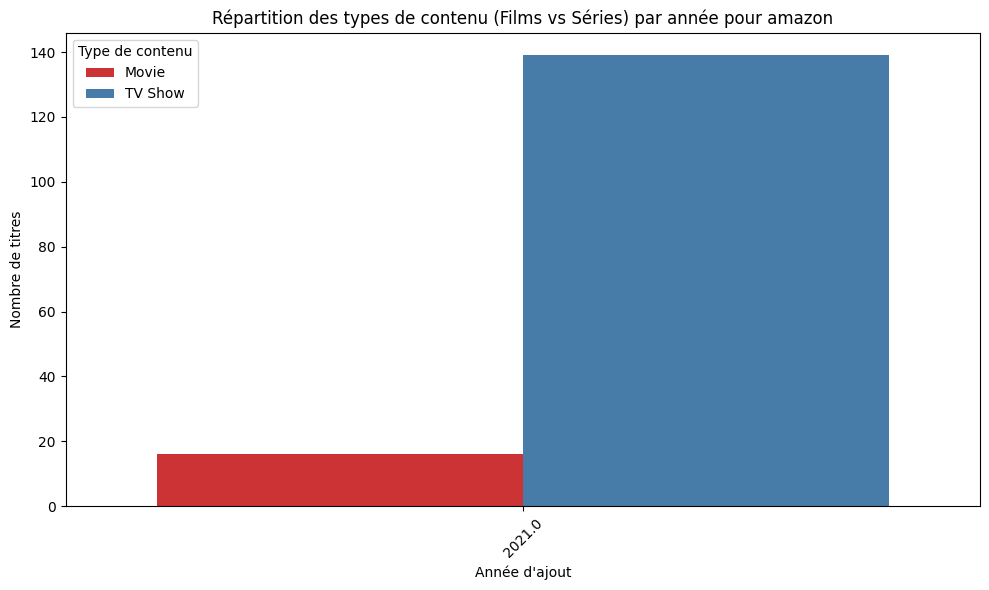

In [82]:
Amazon_df = pd.read_csv('Amazon.csv')

all_df = pd.concat([ Amazon_df])

all_df['date_added'] = pd.to_datetime(all_df['date_added'])

all_df['year_added'] = all_df['date_added'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x='year_added', hue='type', data=all_df, palette='Set1')
plt.xlabel('Année d\'ajout')
plt.ylabel('Nombre de titres')
plt.title('Répartition des types de contenu (Films vs Séries) par année pour amazon')
plt.legend(title='Type de contenu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()